In [1]:
import matplotlib.pyplot as plt
import torch

from cheetah import ParticleBeam

In [2]:
num_runs = 10
num_samples = 10000

mean = torch.zeros(6)
cov = torch.diag(torch.tensor((1.0, 1.0, 9.0, 9.0, 1.0, 1.0))) * 1e-6
normal_distribution = torch.distributions.MultivariateNormal(
    mean, covariance_matrix=cov
)
coordinates_6d = normal_distribution.sample((num_runs, num_samples))
coordinates_7d = torch.concatenate(
    (coordinates_6d, torch.ones(num_runs, num_samples, 1)), dim=-1
)

coordinates_7d.shape

torch.Size([10, 10000, 7])

In [3]:
vectorized_beam = ParticleBeam(particles=coordinates_7d, energy=torch.tensor(40.0e6))
vectorized_beam.particles.shape

torch.Size([10, 10000, 7])

In [4]:
single_beam = vectorized_beam[0]
single_beam.particles.shape

torch.Size([10000, 7])

In [5]:
vectorized_beam.particles.shape

torch.Size([10, 10000, 7])

In [6]:
vectorized_beam.x.shape

torch.Size([10, 10000])

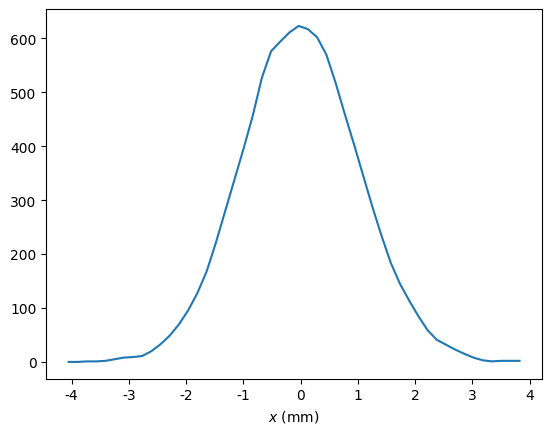

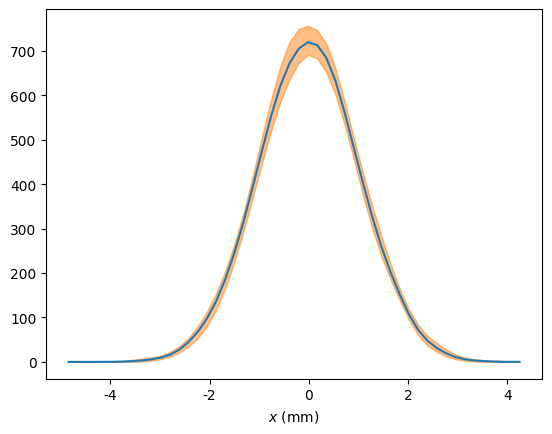

In [7]:
single_beam.plot_1d_distribution(dimension="x", bins=50, smoothing=1.0)
plt.show()
vectorized_beam.plot_1d_distribution(dimension="x", bins=50, smoothing=1.0)
plt.show()

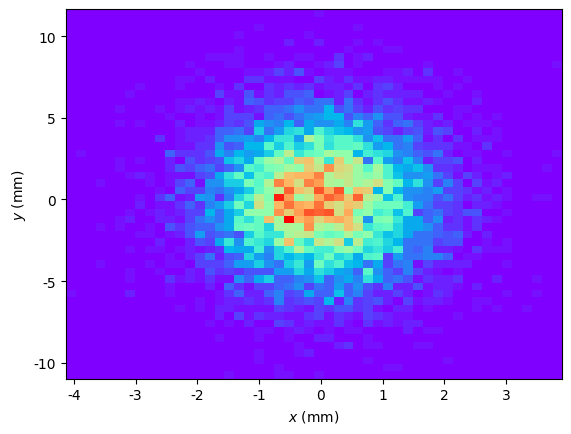

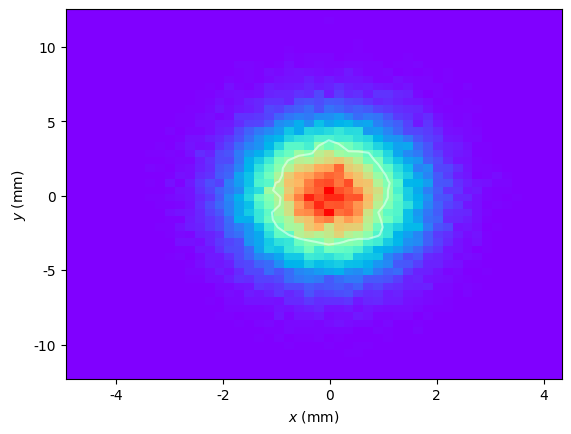

In [8]:
single_beam.plot_2d_distribution(
    x_dimension="x",
    y_dimension="y",
    bins=(50, 50),
    errorbar=("pi", 90),
    confidence_contours=(2.0,),
    # histogram_smoothing=10.0,
    contour_smoothing=1.0,
    style="histogram",
)
plt.show()
vectorized_beam.plot_2d_distribution(
    x_dimension="x",
    y_dimension="y",
    bins=(50, 50),
    errorbar=("pi", 90),
    confidence_contours=(2.0,),
    # histogram_smoothing=10.0,
    contour_smoothing=1.0,
    style="histogram",
)
plt.show()

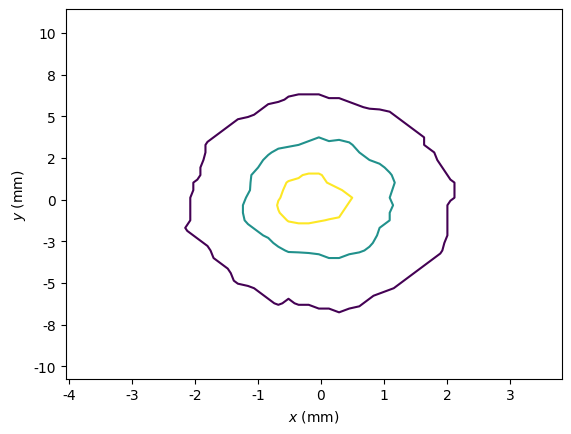

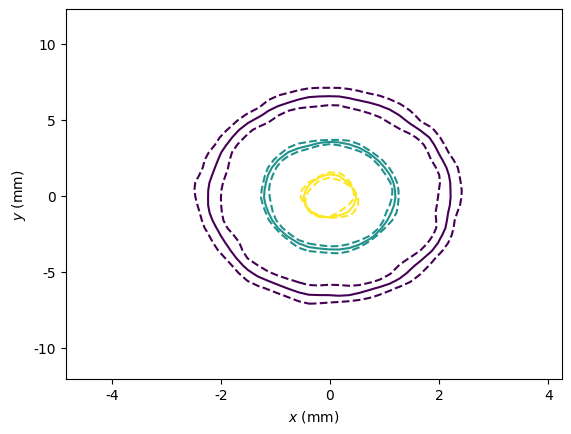

In [9]:
single_beam.plot_2d_distribution(
    x_dimension="x",
    y_dimension="y",
    bins=(50, 50),
    errorbar=("pi", 90),
    confidence_contours=(2,),
    # histogram_smoothing=10.0,
    contour_smoothing=1.0,
    style="contour",
)
plt.show()
vectorized_beam.plot_2d_distribution(
    x_dimension="x",
    y_dimension="y",
    bins=(50, 50),
    errorbar=("pi", 90),
    confidence_contours=(2,),
    # histogram_smoothing=10.0,
    contour_smoothing=1.0,
    style="contour",
)
plt.show()

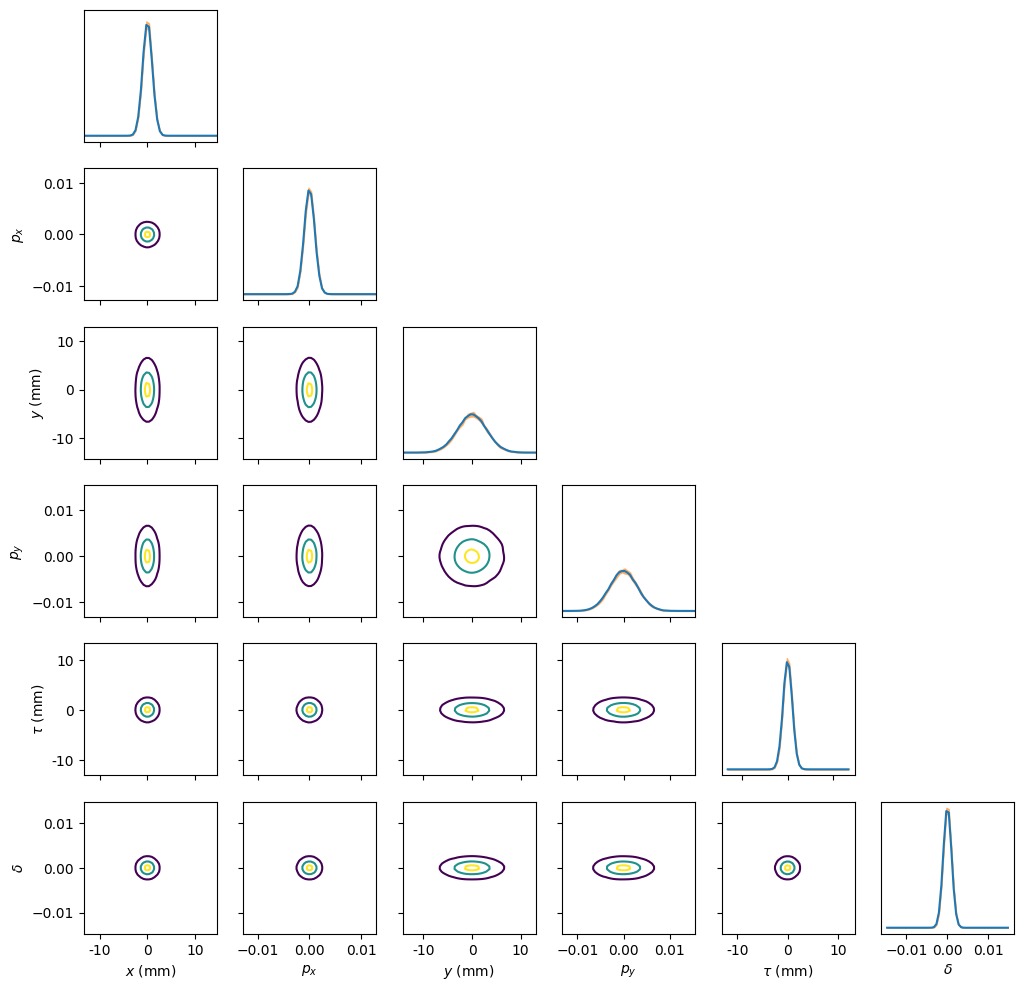

In [10]:
vectorized_beam.plot_distribution(bins=50, plot_2d_kws={"style": "contour"})
plt.show()

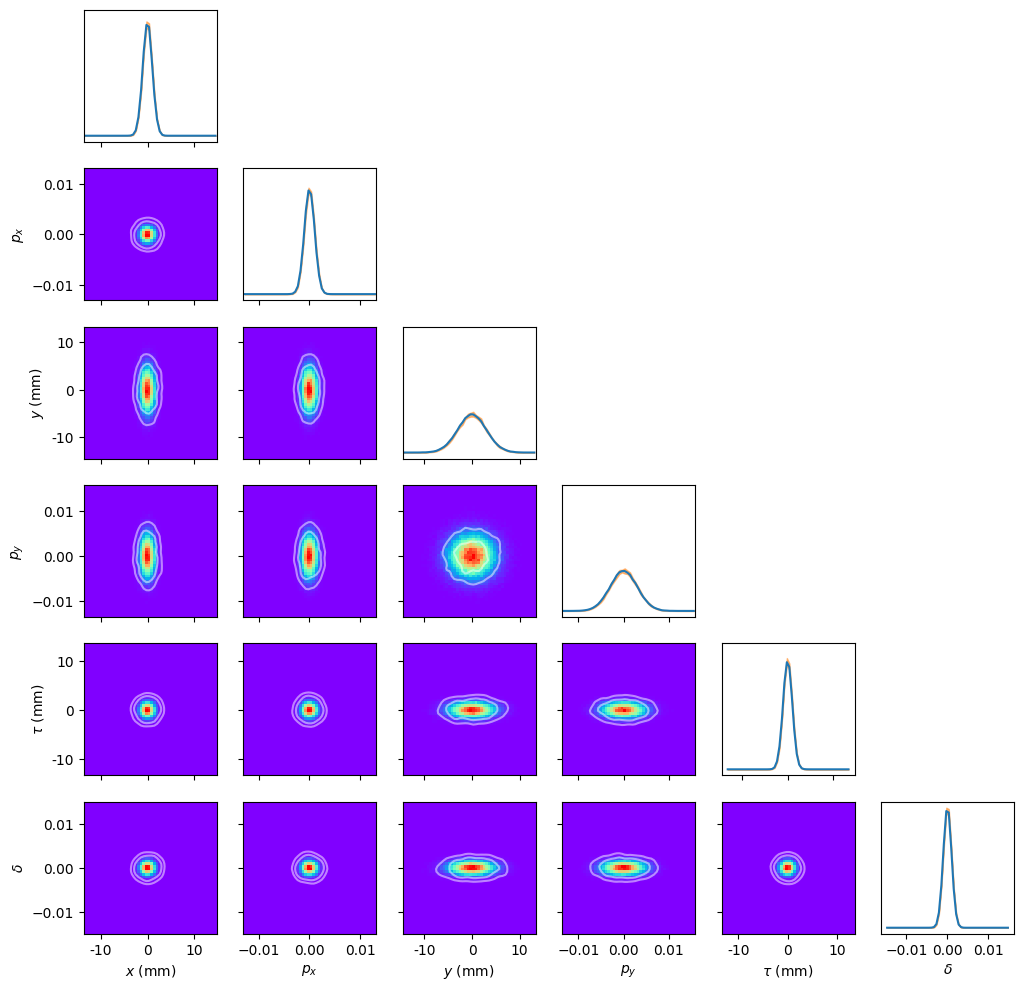

In [11]:
vectorized_beam.plot_distribution(
    bins=50, plot_2d_kws=dict(style="histogram", confidence_contours=(1, 2))
)
plt.show()